# Capstone Project


In [278]:
import pandas as pd
import numpy as np

print("Hello Capstone Project Course! ");

Hello Capstone Project Course! 


# Business Understanding

The Objective of this data mining project is to predict whether to open a pub business at a borough. The goal is to predict the whether we should open a pub company at the location. 

# Data Preparation

The following codes prepare and collect the data from a website and foursquare database. 

In [279]:
#!pip install --user urllib2

from bs4 import BeautifulSoup
import requests
import pandas as pd

#Get the url
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

#get the html
r = requests.get(url)
content = r.text

#Get the table
soup = BeautifulSoup(content)
table = soup.find("table", {"class":"wikitable sortable"})

#Get the headers
th = table.find_all("th")
headers = []
for t in th: 
    headers.append(t.text.replace("\n", ""))
print(headers)

#get the table rows
tableRows = table.find_all("tr")

#for every row in the table rows, if borough is not assigned, remove, if neighbour not assigned, neighbour value = borough
data = []
for row in tableRows: 
    td = row.find_all("td")
    
    
    if(td): 
        if(td[1].text != "Not assigned"): 
            col = []
            i = 0
            borough = ""
            for t in td:
                c = t.text.strip()
                
                if(i == 1): 
                    borough = c
                #if neigbour = not assigned, neighbour = borough
                if(c != "Not assigned"): 
                    col.append(c)
                else: 
                    col.append(borough)
                    
                i = i + 1
            
            data.append(col)

            #For one row: combine the neighbour variable when first variable is duplicated
def combine(ro, data): 
    
    for row in data: 
        if (ro[0] == row[0]): 
            if(ro[2] not in row[2]): 
                row[2] = row[2] + "," + ro[2];
        
    return data  

#All rows: combine neighbour variables when first variable is duplicated
for row in data: 
    data = combine(row, data)

#remove any duplicated values in the combined neighbour variables
for row in data: 
    temp = list(set(row[2].split(",")))
    row[2] = ", ".join(temp)
    
          
#remove duplicated rows based on postcode            
df = pd.DataFrame(data, columns=headers)
df.drop_duplicates(subset='Postcode', keep="first", inplace=True)



# Combine the data with latitude and logitude 

import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_1ff87147f61247d99246b6a446976271 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YqozYB_MiYiXjgpeiDTGfejypaMfFdu3jdnvylLzIPQF',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_1ff87147f61247d99246b6a446976271.get_object(Bucket='mydatasciencecapstoneproject-donotdelete-pr-1trvxd1omrxgxz',Key='Geospatial_Coordinates (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

df2 = pd.merge(df, df_data_1, how='left', left_on=['Postcode'], right_on = ['Postal Code'])
df2


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /opt/conda/envs/DSX-Python35/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['Postcode', 'Borough', 'Neighbourhood']


,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",M5A,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",M6A,43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,M7A,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,M9A,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",M1B,43.806686,-79.194353
7,M3B,North York,Don Mills North,M3B,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",M4B,43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson, Garden District",M5B,43.657162,-79.378937


In [280]:
#REtrieve data from foursquare

CLIENT_ID = 'CB24R3RDGKAJ3MA1WFU1DFIJL02Q3MV2XBD31VFXINH0P45K' # your Foursquare ID
CLIENT_SECRET = 'V3ZMW4U1Y4EE4ZJGKRC42QUHCGXO4E5PSXL54SWW4AJEUQZW' # your Foursquare Secret
VERSION = '20181116'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)




Latitude2 = df2["Latitude"]
Logitude2 = df2["Longitude"]

#Extract all the queries for all the rows
jsonLs = []
i = 0
for l in Latitude2: 
    search_query = ''
    radius = 500
    latitude = l
    longitude = Logitude2[0]

    #print(search_query + ' .... OK!')
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    #print(url)
    
    results = requests.get(url).json()
    jsonLs.append(results)
    

    # function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
    
    

Latitude2 = df2["Latitude"]
Logitude2 = df2["Longitude"]
postcode = df2["Postcode"]
borough = df2["Borough"]
neighbourhood = df2["Neighbourhood"]

#To combine data from foursquare and the previous data from wiki. 
i = 0
newDF = pd.DataFrame()
for js in jsonLs: 

    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    
    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    
    
    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]
    
    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
    
    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

    lat = Latitude2[i]
    lon = Logitude2[i]
    po = postcode[i]
    bo = borough[i]
    ne = neighbourhood[i]
    
    temp = []
    temp1 = []
    temp2 = []
    temp3 = []
    temp4 = []
    
    for x in range(dataframe_filtered.shape[0]): 
        temp.append(lat)
        temp1.append(lon)
        temp2.append(po)
        temp3.append(bo)
        temp4.append(ne)
    
    dataframe_filtered["Postcode"] = temp2
    dataframe_filtered["Borough"] = temp3
    dataframe_filtered["Neighbourhood"] = temp4
    dataframe_filtered["Latitude"] = temp
    dataframe_filtered["Longitude"] = temp1
    
    newDF = newDF.append(dataframe_filtered, ignore_index = True)
    
    i = i + 1
    
    
newDF


Your credentails:
CLIENT_ID: CB24R3RDGKAJ3MA1WFU1DFIJL02Q3MV2XBD31VFXINH0P45K
CLIENT_SECRET:V3ZMW4U1Y4EE4ZJGKRC42QUHCGXO4E5PSXL54SWW4AJEUQZW


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,...,lng,neighborhood,postalCode,state,id,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,Tommy Thompson Park,Park,Leslie St,CA,Toronto,Canada,at Unwin Ave,765,"[Leslie St (at Unwin Ave), Toronto ON, Canada]","[{'label': 'display', 'lat': 43.6341804999836,...",...,-79.323671,NaN,NaN,ON,4adb5deef964a5207d2621e3,M3A,North York,Parkwoods,43.753259,-79.329656
1,Aquatic Park Sailing Club,Beach,NaN,CA,NaN,Canada,NaN,235,[Canada],"[{'label': 'display', 'lat': 43.630888, 'lng':...",...,-79.330414,NaN,NaN,NaN,51aa40fa498ed3e61dcb4bed,M3A,North York,Parkwoods,43.753259,-79.329656
2,Tom Thomson Park,Lake,1 Leslie St,CA,Toronto,Canada,Commisaioner St,2636,"[1 Leslie St (Commisaioner St), Toronto ON, Ca...","[{'label': 'display', 'lat': 43.65199152891608...",...,-79.322768,NaN,NaN,ON,4fae909be4b0604807f07b37,M3A,North York,Parkwoods,43.753259,-79.329656
3,Floating Bridge,Bridge,NaN,CA,Toronto,Canada,NaN,345,"[Toronto ON, Canada]","[{'label': 'display', 'lat': 43.62603, 'lng': ...",...,-79.331486,NaN,NaN,ON,5ae66a8b73fe25002cc2f20c,M3A,North York,Parkwoods,43.753259,-79.329656
4,Hanlan's Point Beach,None,NaN,CA,Toronto,Canada,NaN,2481,"[Toronto ON, Canada]","[{'label': 'display', 'lat': 43.6271669, 'lng'...",...,-79.360372,NaN,NaN,ON,5545d040498e2facac03b33d,M3A,North York,Parkwoods,43.753259,-79.329656
5,Canary District,Event Space,NaN,CA,NaN,Canada,NaN,3474,[Canada],"[{'label': 'display', 'lat': 43.65317707979736...",...,-79.356669,NaN,NaN,NaN,4fbe9281e4b00ca0debe3c48,M3A,North York,Parkwoods,43.753259,-79.329656
6,South Riverdale,Neighborhood,NaN,CA,NaN,Canada,NaN,1522,[Canada],"[{'label': 'display', 'lat': 43.642067, 'lng':...",...,-79.334482,NaN,NaN,NaN,53151a0de4b0e72a36f2e6c9,M3A,North York,Parkwoods,43.753259,-79.329656
7,The Aviary,Pub,NaN,CA,Toronto,Canada,NaN,3396,"[Toronto ON M5A 1H7, Canada]","[{'label': 'display', 'lat': 43.653305, 'lng':...",...,-79.354850,NaN,M5A 1H7,ON,5b7ccd5e1f8ed6002c9bd7d0,M3A,North York,Parkwoods,43.753259,-79.329656
8,Port Lands,Neighborhood,NaN,CA,NaN,Canada,NaN,2426,[Canada],NaN,...,-79.351883,NaN,NaN,NaN,5314b17ae4b0d805d3736b07,M3A,North York,Parkwoods,43.753259,-79.329656
9,Floorplay Socks,Clothing Store,NaN,CA,Toronto,Canada,NaN,3318,"[Toronto ON M5A 3C4, Canada]","[{'label': 'display', 'lat': 43.650734, 'lng':...",...,-79.357615,NaN,M5A 3C4,ON,5b745b611f74400039f4c034,M3A,North York,Parkwoods,43.753259,-79.329656


# Data Understanding

In this stage, we going to understand more about the data. We will be using clustering, data visualizationsa and statistics to explore the data. 

In [281]:
#get the statistics
newDF.describe()

,distance,lat,lng,Latitude,Longitude
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,2480.633333,43.644033,-79.346990,43.704608,-79.397153
std,937.247165,0.010526,0.011455,0.052216,0.096689
min,235.000000,43.626030,-79.360372,43.602414,-79.615819
25%,1899.000000,43.631507,-79.356266,43.659526,-79.464763
50%,2621.000000,43.647786,-79.352529,43.696948,-79.388790
75%,3318.000000,43.653305,-79.336585,43.745906,-79.340923
max,3687.000000,43.655798,-79.322768,43.836125,-79.160497


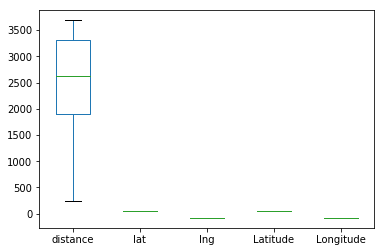

In [282]:
import matplotlib.pyplot as plt

#Box PLots (Data Visualizations)
plt.figure();
newDF.plot.box()

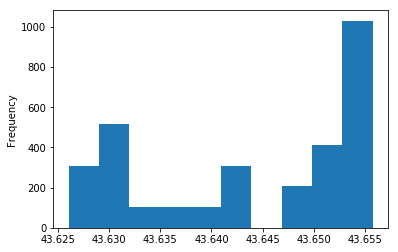

In [283]:

# Not Normal

plt.figure();
newDF["lat"].plot.hist()

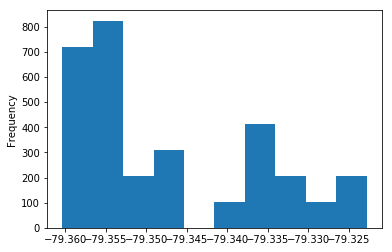

In [284]:
#Not Normal DIstribution
plt.figure();
newDF["lng"].plot.hist()

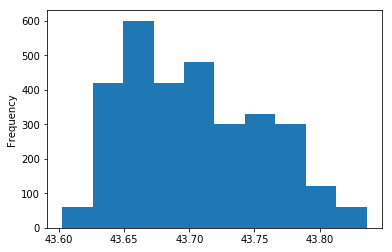

In [285]:
#No Normal Distribution
plt.figure();
newDF["Latitude"].plot.hist()
    

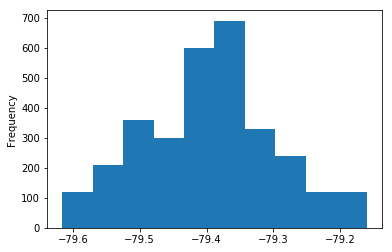

In [286]:
#Looks Normally disributed. Can be used in many parametric statistics. 

plt.figure();
newDF["Longitude"].plot.hist()

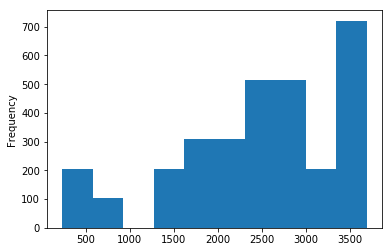

In [287]:
#Not Normal

plt.figure();
newDF["distance"].plot.hist()

In [288]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 20

grouped_clustering = df2.drop('Neighbourhood', 1)
grouped_clustering = grouped_clustering.drop('Borough', 1)
grouped_clustering = grouped_clustering.drop('Postcode', 1)
grouped_clustering = grouped_clustering.drop('Postal Code', 1)


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

result["clusters"] = kmeans.labels_
result.sort_values(by=["clusters"])


#The top 20 neighbourhood that ar enear each other based on their Latitude and Longitude. 

,Postcode,Borough,Neighbourhood,Latitude,Longitude,clusters
0,M3A,North York,Parkwoods,43.753259,-79.329656,0
7,M3B,North York,Don Mills North,43.745906,-79.352188,0
45,M2L,North York,"Silver Hills, York Mills",43.757490,-79.374714,0
33,M2J,North York,"Henry Farm, Fairview, Oriole",43.778517,-79.346556,0
60,M3N,North York,Downsview Northwest,43.761631,-79.520999,1
57,M9M,North York,"Humberlea, Emery",43.724766,-79.532242,1
53,M3M,North York,Downsview Central,43.728496,-79.495697,1
70,M9P,Etobicoke,Westmount,43.696319,-79.532242,1
49,M6L,North York,"Upwood Park, North Park, Maple Leaf Park",43.713756,-79.490074,1
46,M3L,North York,Downsview West,43.739015,-79.506944,1


# Data Preparation

We will prepare the data again. This time, we will select the variables needed for the modeling stage. 

In [289]:
#Select the variables that we need. 

newDF2 = newDF[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude', 'name','categories', 'address', 'distance', 'lat', 'lng', 'postalCode']]
newDF2

,Postcode,Borough,Neighbourhood,Latitude,Longitude,name,categories,address,distance,lat,lng,postalCode
0,M3A,North York,Parkwoods,43.753259,-79.329656,Tommy Thompson Park,Park,Leslie St,765,43.634180,-79.323671,NaN
1,M3A,North York,Parkwoods,43.753259,-79.329656,Aquatic Park Sailing Club,Beach,NaN,235,43.630888,-79.330414,NaN
2,M3A,North York,Parkwoods,43.753259,-79.329656,Tom Thomson Park,Lake,1 Leslie St,2636,43.651992,-79.322768,NaN
3,M3A,North York,Parkwoods,43.753259,-79.329656,Floating Bridge,Bridge,NaN,345,43.626030,-79.331486,NaN
4,M3A,North York,Parkwoods,43.753259,-79.329656,Hanlan's Point Beach,None,NaN,2481,43.627167,-79.360372,NaN
5,M3A,North York,Parkwoods,43.753259,-79.329656,Canary District,Event Space,NaN,3474,43.653177,-79.356669,NaN
6,M3A,North York,Parkwoods,43.753259,-79.329656,South Riverdale,Neighborhood,NaN,1522,43.642067,-79.334482,NaN
7,M3A,North York,Parkwoods,43.753259,-79.329656,The Aviary,Pub,NaN,3396,43.653305,-79.354850,M5A 1H7
8,M3A,North York,Parkwoods,43.753259,-79.329656,Port Lands,Neighborhood,NaN,2426,43.643548,-79.351883,NaN
9,M3A,North York,Parkwoods,43.753259,-79.329656,Floorplay Socks,Clothing Store,NaN,3318,43.650734,-79.357615,M5A 3C4


In [290]:
#Select rows with categories = Pub

newDF3 = newDF2.loc[newDF2['categories'] == "Pub"]
newDF3

,Postcode,Borough,Neighbourhood,Latitude,Longitude,name,categories,address,distance,lat,lng,postalCode
7,M3A,North York,Parkwoods,43.753259,-79.329656,The Aviary,Pub,NaN,3396,43.653305,-79.35485,M5A 1H7
37,M4A,North York,Victoria Village,43.725882,-79.315572,The Aviary,Pub,NaN,3396,43.653305,-79.35485,M5A 1H7
67,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,The Aviary,Pub,NaN,3396,43.653305,-79.35485,M5A 1H7
97,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,The Aviary,Pub,NaN,3396,43.653305,-79.35485,M5A 1H7
127,M7A,Queen's Park,Queen's Park,43.662301,-79.389494,The Aviary,Pub,NaN,3396,43.653305,-79.35485,M5A 1H7
157,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242,The Aviary,Pub,NaN,3396,43.653305,-79.35485,M5A 1H7
187,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,The Aviary,Pub,NaN,3396,43.653305,-79.35485,M5A 1H7
217,M3B,North York,Don Mills North,43.745906,-79.352188,The Aviary,Pub,NaN,3396,43.653305,-79.35485,M5A 1H7
247,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937,The Aviary,Pub,NaN,3396,43.653305,-79.35485,M5A 1H7
277,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,The Aviary,Pub,NaN,3396,43.653305,-79.35485,M5A 1H7


In [291]:
#Count the pubs number in each Borough

newDF4 = newDF3['Borough'].value_counts().reset_index()
newDF4

,index,Borough
0,North York,24
1,Downtown Toronto,18
2,Scarborough,17
3,Etobicoke,12
4,Central Toronto,9
5,West Toronto,6
6,East Toronto,5
7,East York,5
8,York,5
9,Queen's Park,1


In [292]:
#We processed the data, includes the isSetUp variable using teh following rules: 

#If there are less than 10 pubs in a Borough, It is risky to open a business 
#If there are more than 24 pubs in a Borough, It is risky to open a business as there are many comeptitors.

#Too risky, isSetUp = 0
#Not Risky, isSSetUp = 1


def split_num(x): 
    if x < 10: 
        return 0
    if x > 24: 
        return 0
    else: return 1

newDF5 = newDF4["Borough"].apply(split_num)
newDF4["isSetUp"] = newDF5


newDF6 = newDF3[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']]


merged_df = newDF6.merge(newDF4, how="left", left_on = ["Borough"], right_on = ["index"])
merged_df


,Postcode,Borough_x,Neighbourhood,Latitude,Longitude,index,Borough_y,isSetUp
0,M3A,North York,Parkwoods,43.753259,-79.329656,North York,24,1
1,M4A,North York,Victoria Village,43.725882,-79.315572,North York,24,1
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,Downtown Toronto,18,1
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,North York,24,1
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494,Queen's Park,1,0
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242,Etobicoke,12,1
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,Scarborough,17,1
7,M3B,North York,Don Mills North,43.745906,-79.352188,North York,24,1
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937,East York,5,0
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,Downtown Toronto,18,1


In [293]:
#We select the Latitude and Longitude variables, with the isSetUp variable

merged_df = merged_df[["Latitude", "Longitude", "isSetUp"]]
merged_df

,Latitude,Longitude,isSetUp
0,43.753259,-79.329656,1
1,43.725882,-79.315572,1
2,43.654260,-79.360636,1
3,43.718518,-79.464763,1
4,43.662301,-79.389494,0
5,43.667856,-79.532242,1
6,43.806686,-79.194353,1
7,43.745906,-79.352188,1
8,43.706397,-79.309937,0
9,43.657162,-79.378937,1


In [294]:
y = merged_df["isSetUp"].values
y

X = merged_df[["Latitude", "Longitude"]].values
X

array([[ 43.7532586, -79.3296565],
       [ 43.7258823, -79.3155716],
       [ 43.6542599, -79.3606359],
       [ 43.718518 , -79.4647633],
       [ 43.6623015, -79.3894938],
       [ 43.6678556, -79.5322424],
       [ 43.8066863, -79.1943534],
       [ 43.7459058, -79.352188 ],
       [ 43.7063972, -79.309937 ],
       [ 43.6571618, -79.3789371],
       [ 43.709577 , -79.4450726],
       [ 43.6509432, -79.5547244],
       [ 43.7845351, -79.1604971],
       [ 43.7258997, -79.340923 ],
       [ 43.6953439, -79.3183887],
       [ 43.6514939, -79.3754179],
       [ 43.6937813, -79.4281914],
       [ 43.6435152, -79.5772008],
       [ 43.7635726, -79.1887115],
       [ 43.6763574, -79.2930312],
       [ 43.6447708, -79.3733064],
       [ 43.6890256, -79.453512 ],
       [ 43.7709921, -79.2169174],
       [ 43.7090604, -79.3634517],
       [ 43.6579524, -79.3873826],
       [ 43.669542 , -79.4225637],
       [ 43.773136 , -79.2394761],
       [ 43.8037622, -79.3634517],
       [ 43.7543283,

# Modeling

We will create prediction or classification model at this stage. We will use KNN, SVM, Decsion Tree, Logistic Regressions.   

In [295]:
#Split training set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)  
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
k = 8

print("k = 8 is the best. The following will shows how to find teh best k values")

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
yhat [0:5]

Train set: (82, 2) (82,)
Test set: (21, 2) (21,)
k = 8 is the best. The following will shows how to find teh best k values


array([0, 1, 1, 1, 1])

In [296]:
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([ 0.76190476,  0.71428571,  0.76190476,  0.80952381,  0.9047619 ,
        0.9047619 ,  0.9047619 ,  0.9047619 ,  0.9047619 ])

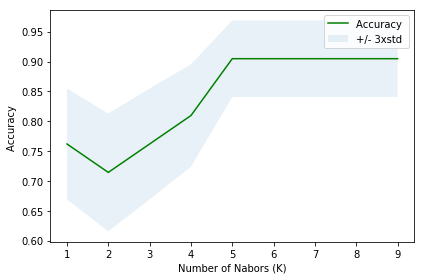

The best accuracy was with 0.904761904762 with k= 5


In [297]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


In [298]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [299]:
Tree.fit(X_train,y_train)

yhat = Tree.predict(X_test)
yhat [0:5]


array([0, 1, 0, 1, 0])

In [300]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [301]:
yhat = clf.predict(X_test)
yhat [0:5]


array([1, 1, 1, 1, 1])

In [302]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [303]:
yhat = LR.predict(X_test)
yhat [0:5]


array([1, 1, 1, 1, 1])

# Evaluation

The following is the evaluation of our models accuracy and we will select the most accurate model. 

In [304]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print("Based on the testing sets, we predict the variable using the models we trained previously. ")

#KNN
neigh

KNNyhat = neigh.predict(X_test)
KNNyhat [0:5]

#Decision Tree
Tree

Treeyhat = Tree.predict(X_test)
Treeyhat [0:5]

#SVM
clf

SVMyhat = clf.predict(X_test)
SVMyhat [0:5]

#Logistic Regression
LR

LRyhat = LR.predict(X_test)
LRyhat [0:5]

Based on the testing sets, we predict the variable using the models we trained previously. 


array([1, 1, 1, 1, 1])

In [305]:
print("The PRecision and Recall of the Models. You may choose the most accurate one or for myself, I combine models with IF rules after analysing the data and see which model predict data at highest accuracy at some conditions");

from sklearn.metrics import confusion_matrix
print("\nKNN Confusion Matrix: \n" + str(confusion_matrix(y_test, KNNyhat)))

from sklearn.metrics import f1_score
print("KNN f1 Score: " + str(f1_score(y_test, KNNyhat, average='weighted') ))

from sklearn.metrics import jaccard_similarity_score
print("KNN jaccard Score: " + str(jaccard_similarity_score(y_test, KNNyhat)))

from sklearn.metrics import accuracy_score
print("KNN Accuracy Score: " + str(accuracy_score(y_test, KNNyhat)))

from sklearn.metrics import precision_score
print("KNN Precision Score: " + str(precision_score(y_test, KNNyhat, average='macro')))

from sklearn.metrics import recall_score
print("KNN Recall Score: " + str(recall_score(y_test, KNNyhat, average='macro')))




from sklearn.metrics import confusion_matrix
print("\nDecision Tree Confusion Matrix: \n" + str(confusion_matrix(y_test, Treeyhat)))

from sklearn.metrics import f1_score
print("Decision Tree f1 Score: " + str(f1_score(y_test, Treeyhat, average='weighted') ))

from sklearn.metrics import jaccard_similarity_score
print("Decison Tree jaccard Score: " + str(jaccard_similarity_score(y_test, Treeyhat)))

from sklearn.metrics import accuracy_score
print("Decison Tree Accuracy Score: " + str(accuracy_score(y_test, Treeyhat)))

from sklearn.metrics import precision_score
print("Decison Tree Precision Score: " + str(precision_score(y_test, Treeyhat, average='macro')))

from sklearn.metrics import recall_score
print("Decison Tree Recall Score: " + str(recall_score(y_test, Treeyhat, average='macro')))




from sklearn.metrics import confusion_matrix
print("\nSVM Confusion Matrix: \n" + str(confusion_matrix(y_test, SVMyhat)))

from sklearn.metrics import f1_score
print("SVM f1 Score: " + str(f1_score(y_test, SVMyhat, average='weighted') ))

from sklearn.metrics import jaccard_similarity_score
print("SVM jaccard Score: " + str(jaccard_similarity_score(y_test, SVMyhat)))

from sklearn.metrics import accuracy_score
print("SVM Accuracy Score: " + str(accuracy_score(y_test, SVMyhat)))

from sklearn.metrics import precision_score
print("SVM Precision Score: " + str(precision_score(y_test, SVMyhat, average='macro')))

from sklearn.metrics import recall_score
print("SVM Recall Score: " + str(recall_score(y_test, SVMyhat, average='macro')))




from sklearn.metrics import confusion_matrix
print("\nLogisitic Regression Confusion Matrix: \n" + str(confusion_matrix(y_test, LRyhat)))

from sklearn.metrics import f1_score
print("Logistic Regression f1 Score: " + str(f1_score(y_test, LRyhat, average='weighted') ))

from sklearn.metrics import jaccard_similarity_score
print("Logistic Regression jaccard Score: " + str(jaccard_similarity_score(y_test, LRyhat)))

from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy Score: " + str(accuracy_score(y_test, LRyhat)))

from sklearn.metrics import precision_score
print("Logistic Regression Precision Score: " + str(precision_score(y_test, LRyhat, average='macro')))

from sklearn.metrics import recall_score
print("Logistic Regression Recall Score: " + str(recall_score(y_test, LRyhat, average='macro')))

print("Seemed like Decision Tree and KNN is the most accuarate")

The PRecision and Recall of the Models. You may choose the most accurate one or for myself, I combine models with IF rules after analysing the data and see which model predict data at highest accuracy at some conditions

KNN Confusion Matrix: 
[[ 9  1]
 [ 1 10]]
KNN f1 Score: 0.904761904762
KNN jaccard Score: 0.904761904762
KNN Accuracy Score: 0.904761904762
KNN Precision Score: 0.904545454545
KNN Recall Score: 0.904545454545

Decision Tree Confusion Matrix: 
[[8 2]
 [5 6]]
Decision Tree f1 Score: 0.662090007628
Decison Tree jaccard Score: 0.666666666667
Decison Tree Accuracy Score: 0.666666666667
Decison Tree Precision Score: 0.682692307692
Decison Tree Recall Score: 0.672727272727

SVM Confusion Matrix: 
[[ 0 10]
 [ 0 11]]
SVM f1 Score: 0.360119047619
SVM jaccard Score: 0.52380952381
SVM Accuracy Score: 0.52380952381
SVM Precision Score: 0.261904761905
SVM Recall Score: 0.5

Logisitic Regression Confusion Matrix: 
[[ 0 10]
 [ 0 11]]
Logistic Regression f1 Score: 0.360119047619
Logist

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Deployment

We can deploy this report or we can develop our own software based on the KNN and Decision Tree models as they have highest accuracy. 
